In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import imageio
import pandas as pd 



In [4]:
im = imageio.imread("./data/imagenes_ML/s11/10.pgm")
im = im.astype(np.uint8)

print(im)

[[ 48  44  49 ...  40  39  37]
 [ 49  45  47 ...  39  40  37]
 [ 45  42  51 ...  36  40  34]
 ...
 [ 42 131 213 ...  43  37  39]
 [194 212 222 ...  37  40  42]
 [211 209 224 ...  38  35  44]]


In [6]:
print ('Max original ' , end= ' ')
print(np.amax(im))
print ('Min original ' , end= ' ')
print(np.amin(im))

Max original  224
Min original  9


In [8]:
im_original = im

im = im / 255

In [10]:
im

Array([[0.00073818, 0.00067666, 0.00075356, ..., 0.00061515, 0.00059977,
        0.00056901],
       [0.00075356, 0.00069204, 0.0007228 , ..., 0.00059977, 0.00061515,
        0.00056901],
       [0.00069204, 0.00064591, 0.00078431, ..., 0.00055363, 0.00061515,
        0.00052288],
       ...,
       [0.00064591, 0.00201461, 0.00327566, ..., 0.00066128, 0.00056901,
        0.00059977],
       [0.00298347, 0.00326028, 0.00341407, ..., 0.00056901, 0.00061515,
        0.00064591],
       [0.00324491, 0.00321415, 0.00344483, ..., 0.00058439, 0.00053825,
        0.00067666]])

In [13]:
print ('Max modif ' , end= ' ')
print(np.amax(im))
print ('Min modif ' , end= ' ')
print(np.amin(im))

Max modif  0.0034448289119569397
Min modif  0.00013840830449826988


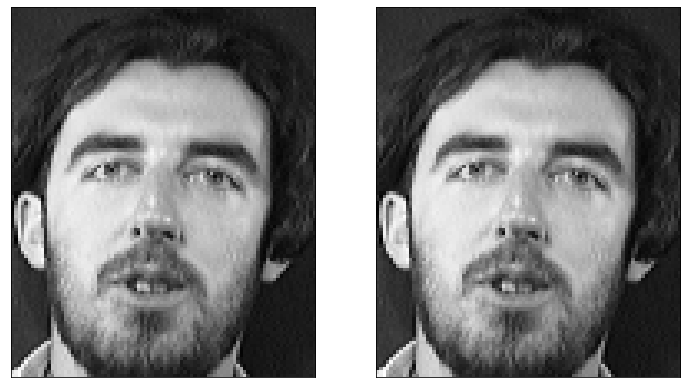

In [15]:
fig , ax = plt.subplots(1, 2, figsize=(12,12),
            subplot_kw={'xticks':[] , 'yticks':[] })

ax[0].imshow(im_original, cmap = 'gray')  
ax[1].imshow(im, cmap = 'gray')  

In [16]:
from glob import iglob


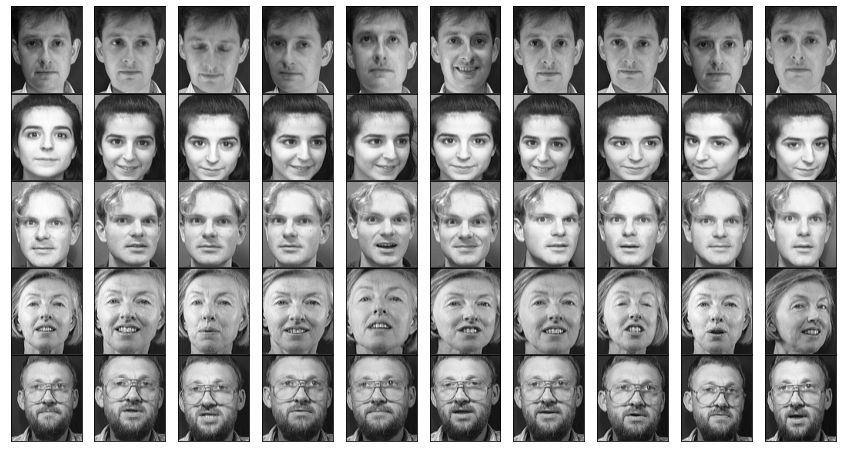

In [35]:
caras = pd.DataFrame([])

for path in iglob('./data/imagenes_ML/*/*.pgm'):
    im = imageio.imread(path)
    cara = pd.Series(im.flatten(), name=path)
    caras = caras.append(cara)


fig , axes = plt.subplots(5, 10, figsize=(15,8),
            subplot_kw={'xticks' : [] , 'yticks' : [] },
            gridspec_kw=dict(hspace = 0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras.iloc[i].values.reshape(112,92), cmap = 'gray')

In [18]:
from sklearn.decomposition import PCA

In [27]:
#Aca vario el n_components de acuerdo al porcentaje de componentes que quiero recuperar (de 0 a 1 )
caras_PCA = PCA(n_components=0.7)

caras_PCA.fit(caras)

PCA(n_components=0.7)

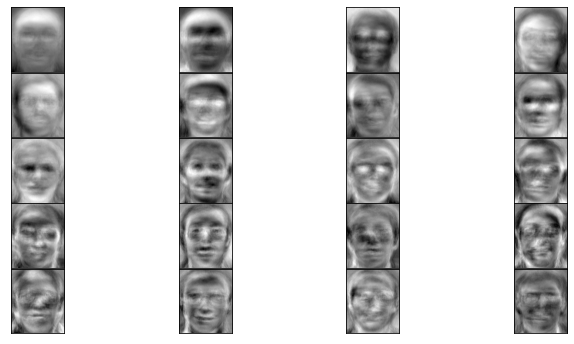

In [32]:
filas = 5
columnas = caras_PCA.n_components_ // filas 

fig , axes = plt.subplots(filas, columnas, figsize=(12,6),
            subplot_kw={'xticks' : [] , 'yticks' : [] },
            gridspec_kw=dict(hspace = 0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras_PCA.components_[i].reshape(112,92), cmap = 'gray')

In [29]:
print(caras_PCA.n_components_)

20


In [30]:
componentes = caras_PCA.transform(caras)
proyeccion = caras_PCA.inverse_transform(componentes)

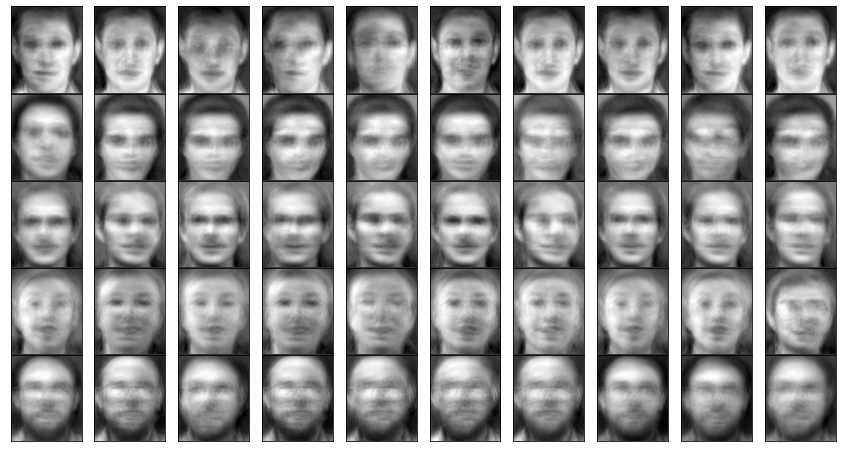

In [31]:
fig , axes = plt.subplots(5, 10, figsize=(15,8),
            subplot_kw={'xticks' : [] , 'yticks' : [] },
            gridspec_kw=dict(hspace = 0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(proyeccion[i].reshape(112,92), cmap = 'gray')